# El Dorado Dataviz

**author**: Santiago Bula M.
**date**: 17-02-2023
**description**: 

#### sources



In [1]:
# Import libraries
import folium
from folium.plugins import BeautifyIcon
import pandas as pd

df = pd.read_excel("El_Dorado_Direct_Flights.xlsx", dtype={"LAT":float(),"LONG":float()})
df.columns = df.columns.str.strip()
df.head()

,City,Passenger,LAT,LONG,Category
0,"Peru Lima, Peru",885278,-12.043333,-77.028333,International
1,"Spain Madrid, Spain",878748,40.416691,-3.700345,International
2,"Mexico Mexico City, Mexico",833665,19.433333,-99.133333,International
3,"Panama Panama City, Panama",801463,8.967300,-79.533900,International
4,"United States Miami, United States",745857,25.775084,-80.194702,International


In [2]:
df_subset = df.sample(n=10)
df_subset["LAT"].mean()

21.146211949999998

In [4]:
# Create map
MAPPA = folium.Map(location=[6.14,-65.61],zoom_start=3.4)

# Add Markers
for index,d in df.iterrows():
    nombre = d['City']
    latitud = d['LAT']
    longitud = d['LONG']
    folium.CircleMarker(location=[latitud, longitud], radius=2.5, popup=nombre, fill=True, fill_opacity=0.7).add_to(MAPPA)
    icons = BeautifyIcon(border_color='transparent', icon_shape='ellipse', number=12, text_color='transparent')
    folium.PolyLine(locations=[[4.7014, -74.1469], [latitud, longitud]], color="darkblue", weight=4, icon=icons, opacity= 0.3).add_to(MAPPA)

# Add mini mapa
from folium import plugins
minimap = plugins.MiniMap()
MAPPA.add_child(minimap)

# Add layer control
folium.TileLayer(
    tiles='https://tileserver.memomaps.de/tilegen/{z}/{x}/{y}.png',
    attr='Map <a href="https://memomaps.de/">memomaps.de</a> <a href="http://creativecommons.org/licenses/by-sa/2.0/">CC-BY-SA</a>, map data &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
    name='Karte',
    #overlay=False,
    control=True
).add_to(MAPPA)

folium.TileLayer('Stamen Terrain').add_to(MAPPA)
#folium.TileLayer('Stamen Toner').add_to(MAPPA)
#folium.TileLayer('Stamen Water Color').add_to(MAPPA)
folium.TileLayer('cartodbpositron').add_to(MAPPA)
folium.TileLayer('cartodbdark_matter').add_to(MAPPA)

folium.TileLayer(
    tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
    attr='Esri',
    name='Esri WorldImagery',
    overlay=False,
    control=True
).add_to(MAPPA) 

folium.TileLayer(
    tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Street_Map/MapServer/tile/{z}/{y}/{x}',
    attr='Source: Esri, DeLorme, NAVTEQ, USGS, Intermap, iPC, NRCAN, Esri Japan, METI, Esri China (Hong Kong), Esri (Thailand), TomTom, 2012',
    name='World Street Map',
    overlay=False,
    control=True
).add_to(MAPPA)

folium.TileLayer(
    tiles='https://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/tile/{z}/{y}/{x}',
    attr='Source: National Geographic',
    name='NatGeo',
    overlay=False,
    control=True
).add_to(MAPPA)

folium.TileLayer(
    tiles='https://{s}.tile-cyclosm.openstreetmap.fr/cyclosm/{z}/{x}/{y}.png',
    attr='CyclOSM - Open Bicycle render',
    name='Cycle',
    overlay=False,
    control=True
).add_to(MAPPA)


folium.LayerControl().add_to(MAPPA)

In [5]:
# Check the map
MAPPA.save("MAPPA.html")
MAPPA

In [6]:
# Create clusters
from folium.plugins import MarkerCluster
MAPPA_2 = folium.Map(location=[6.14,-65.61], zoom_start=5)

MC = MarkerCluster()

for row in df.itertuples():
    MC.add_child(folium.Marker(
    location=[row.LAT,row.LONG],
    popup=row.City, tooltip=row.Category,
    icon=folium.Icon(color="cadetblue", icon="plane")))

MAPPA_2.add_child(MC)

# Add Mini Map
from folium import plugins
minimap = plugins.MiniMap()
MAPPA_2.add_child(minimap)

# Add layer control
folium.TileLayer(
    tiles='https://tileserver.memomaps.de/tilegen/{z}/{x}/{y}.png',
    attr='Map <a href="https://memomaps.de/">memomaps.de</a> <a href="http://creativecommons.org/licenses/by-sa/2.0/">CC-BY-SA</a>, map data &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
    name='Karte',
    #overlay=False,
    control=True
).add_to(MAPPA_2)

folium.TileLayer('Stamen Terrain').add_to(MAPPA_2)
#folium.TileLayer('Stamen Toner').add_to(MAPPA)
#folium.TileLayer('Stamen Water Color').add_to(MAPPA)
folium.TileLayer('cartodbpositron').add_to(MAPPA_2)
folium.TileLayer('cartodbdark_matter').add_to(MAPPA_2)

folium.TileLayer(
    tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
    attr='Esri',
    name='Esri WorldImagery',
    overlay=False,
    control=True
).add_to(MAPPA_2) 

folium.TileLayer(
    tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Street_Map/MapServer/tile/{z}/{y}/{x}',
    attr='Source: Esri, DeLorme, NAVTEQ, USGS, Intermap, iPC, NRCAN, Esri Japan, METI, Esri China (Hong Kong), Esri (Thailand), TomTom, 2012',
    name='World Street Map',
    overlay=False,
    control=True
).add_to(MAPPA_2)

folium.TileLayer(
    tiles='https://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/tile/{z}/{y}/{x}',
    attr='Source: National Geographic',
    name='NatGeo',
    overlay=False,
    control=True
).add_to(MAPPA_2)

folium.TileLayer(
    tiles='https://{s}.tile-cyclosm.openstreetmap.fr/cyclosm/{z}/{x}/{y}.png',
    attr='CyclOSM - Open Bicycle render',
    name='Cycle',
    overlay=False,
    control=True
).add_to(MAPPA_2)

folium.LayerControl().add_to(MAPPA_2)

# Print the map
MAPPA_2

In [7]:
MAPPA_2.save("index.html")

# Bubble map outbound passenger 

In [8]:
# Example how to extract data

boxes = {'Color': ['Green','Green','Green','Blue','Blue','Red','Red','Red'],
         'Shape': ['Rectangle','Rectangle','Square','Rectangle','Square','Square','Square','Rectangle'],
         'Price': [10,15,5,5,10,15,15,5]
        }

DS = pd.DataFrame(boxes, columns= ['Color','Shape','Price'])
print (DS)

   Color      Shape  Price
0  Green  Rectangle     10
1  Green  Rectangle     15
2  Green     Square      5
3   Blue  Rectangle      5
4   Blue     Square     10
5    Red     Square     15
6    Red     Square     15
7    Red  Rectangle      5


In [9]:
select_color = DS.loc[DS['Color'] == 'Green']
print (select_color)

   Color      Shape  Price
0  Green  Rectangle     10
1  Green  Rectangle     15
2  Green     Square      5


In [5]:
# Import data
data = pd.read_excel(r'El_Dorado_Direct_Flights.xlsx') 
# Convert to Data frama
df2 = pd.DataFrame(data)
# Verify
print(df2.head())

                                 City  Passenger        LAT       LONG  \
0                     Peru Lima, Peru     885278 -12.043333 -77.028333   
1                 Spain Madrid, Spain     878748  40.416691  -3.700345   
2          Mexico Mexico City, Mexico     833665  19.433333 -99.133333   
3          Panama Panama City, Panama     801463   8.967300 -79.533900   
4  United States Miami, United States     745857  25.775084 -80.194702   

        Category  
0  International  
1  International  
2  International  
3  International  
4  International  


In [6]:
National = df2.loc[df2['Category'] == 'National']
print (National.head())

                                City  Passenger        LAT       LONG  \
38      Colombia Medellin, Antioquia    3956006   6.230833 -75.590556   
39       Colombia Cartagena, Bolívar    2947551  10.400000 -75.500000   
40    Colombia Cali, Valle del Cauca    2735432   3.420556 -76.522222   
41  Colombia Barranquilla, Atlántico    1756938  10.963889 -74.796389   
42   Colombia Santa Marta, Magdalena    1526802  11.231973 -74.200745   

    Category  
38  National  
39  National  
40  National  
41  National  
42  National  


In [9]:
import plotly.express as px

fig = px.scatter_mapbox( data_frame=National, lat=National['LAT'],
                        lon=National['LONG'], zoom=5.5, 
                        #color=National['City'],
                        size=National['Passenger'], size_max= 60,
                        width= 1400, height=1000,
                        title="Destinos pasajeros salientes El Dorado")

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})


In [18]:
# Create dataframe
International = df2.loc[df2['Category'] == 'International']

# Set your Mapbox API key
mapbox_access_token = "pk.eyJ1Ijoic2FudGlhZ29idWxhIiwiYSI6ImNsZTkydDVvcTAyNWMzdm51Mm16cmxhOGcifQ.7aCKMUu0MWXyM-TdxdAH-Q"

# Plot map
fig2 = px.scatter_mapbox( data_frame=International, lat=International['LAT'],
                        lon=International['LONG'], zoom=2.5, 
                        hover_name="City",
                        hover_data=["Passenger"],
                        #color=National['City'],
                        size=International['Passenger'], size_max= 40,
                        width= 100%, height=100%,
                        title="Destinos internacionales pasajeros salientes El Dorado")

fig2.update_layout(mapbox_style="open-street-map")
fig2.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig2.show()

In [11]:
fig2.write_html("bubble.html")

# Connection map El Dorado destinations

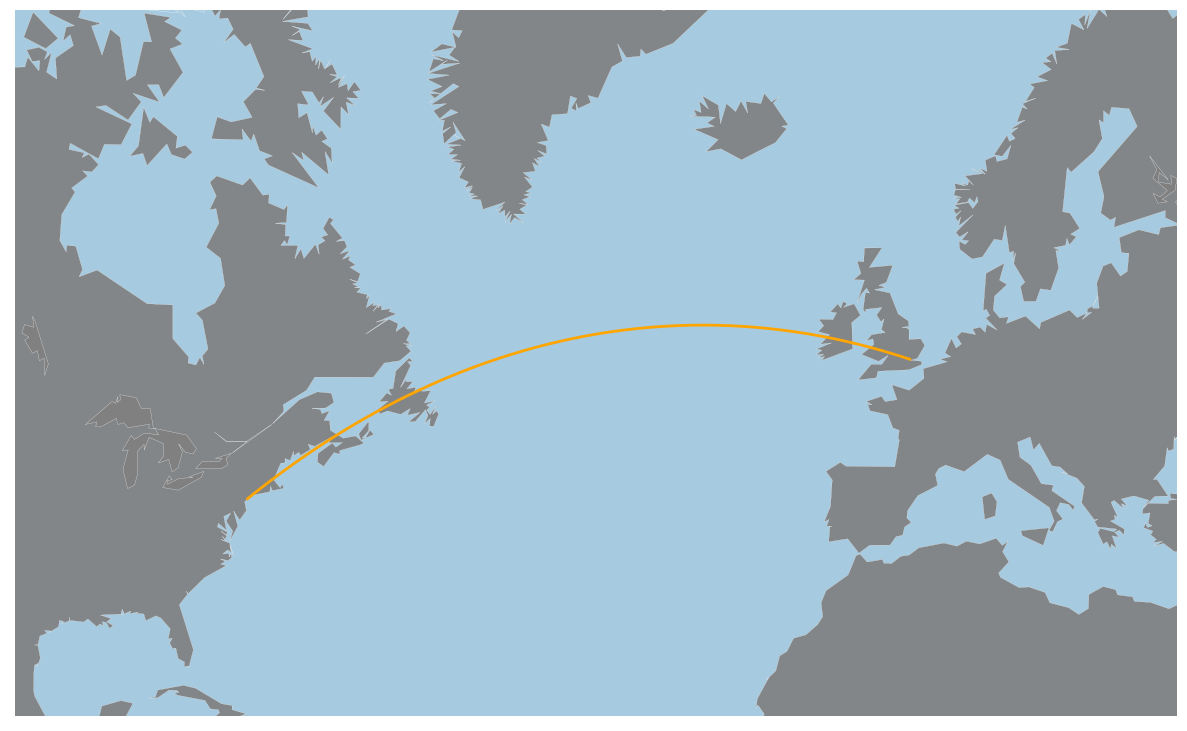

In [ ]:
# libraries
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

# Set the plot size for this notebook:
plt.rcParams["figure.figsize"]=15,12

# A basic map
m=Basemap(llcrnrlon=-100, llcrnrlat=20, urcrnrlon=30, urcrnrlat=70, projection='merc')
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.7, lake_color='grey')
m.drawcoastlines(linewidth=0.1, color="white")

# Background map
m=Basemap(llcrnrlon=-100, llcrnrlat=20, urcrnrlon=30, urcrnrlat=70, projection='merc')
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.7, lake_color='grey')
m.drawcoastlines(linewidth=0.1, color="white")

# Add a connection between new york and London
startlat = 40.78; startlon = -73.98
arrlat = 51.53; arrlon = 0.08
m.drawgreatcircle(startlon, startlat, arrlon, arrlat, linewidth=2, color='orange');

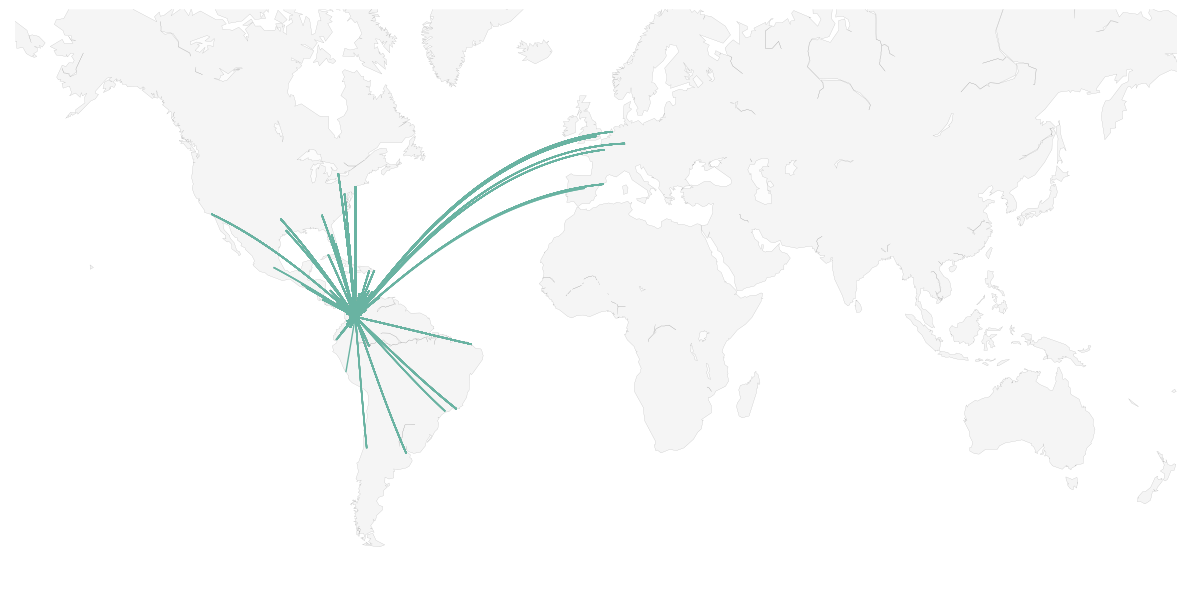

In [ ]:
# Dataframe: list of a few cities with their coordinates:
import pandas as pd

records = pd.read_excel(r'El_Dorado_Direct_Flights.xlsx', sheet_name='Sheet2') 
dg = pd.DataFrame(records)

# Background map
m=Basemap(llcrnrlon=-179, llcrnrlat=-60, urcrnrlon=179, urcrnrlat=70,  projection='merc')
m.drawmapboundary(fill_color='white', linewidth=0)
m.fillcontinents(color='#f2f2f2', alpha=0.7)
m.drawcoastlines(linewidth=0.1, color="gray")

# Loop on every pair of cities to add the connection
for startIndex, startRow in dg.iterrows():
    for endIndex in range(startIndex, len(dg.index)):
        endRow = dg.iloc[endIndex]
        m.drawgreatcircle(startRow.homelon, startRow.homelat, endRow.travellon, endRow.travellat, linewidth=1, color='#69b3a2')


In [ ]:
# Importamos la librería Folium
import folium

# Creamos un mapa centrado en las coordenadas de la ciudad de Nueva York
mapa = folium.Map(location=[40.7128, -74.0060], zoom_start=3)

# Agregamos un marcador para la ciudad de Nueva York
folium.Marker(location=[40.7128, -74.0060], popup='Nueva York').add_to(mapa)

# Agregamos marcadores para otras ciudades y líneas que conectan las ciudades
folium.Marker(location=[37.7749, -122.4194], popup='San Francisco').add_to(mapa)
folium.PolyLine(locations=[[40.7128, -74.0060], [37.7749, -122.4194]], color='red').add_to(mapa)

folium.Marker(location=[51.5074, -0.1278], popup='Londres').add_to(mapa)
folium.PolyLine(locations=[[40.7128, -74.0060], [51.5074, -0.1278]], color='blue').add_to(mapa)

folium.Marker(location=[35.6895, 139.6917], popup='Tokio').add_to(mapa)
folium.PolyLine(locations=[[40.7128, -74.0060], [35.6895, 139.6917]], color='green').add_to(mapa)

# Guardamos el mapa en un archivo HTML
mapa

In [ ]:
ciudades = [
    {'nombre': 'San Francisco', 'latitud': 37.7749, 'longitud': -122.4194, 'color': 'red'},
    {'nombre': 'Londres', 'latitud': 51.5074, 'longitud': -0.1278, 'color': 'blue'},
    {'nombre': 'Tokio', 'latitud': 35.6895, 'longitud': 139.6917, 'color': 'green'},
    {'nombre': 'Madrid', 'latitud': 40.4168, 'longitud': -3.7038, 'color': 'purple'},
    {'nombre': 'Roma', 'latitud': 41.9028, 'longitud': 12.4964, 'color': 'orange'}
]

for ciudad in ciudades:
    nombre = ciudad['nombre']
    latitud = ciudad['latitud']
    longitud = ciudad['longitud']
    color = ciudad['color']
    folium.Marker(location=[latitud, longitud], popup=nombre).add_to(mapa)
    folium.PolyLine(locations=[[40.7128, -74.0060], [latitud, longitud]], color=color).add_to(mapa)

mapa

In [ ]:
# Libraries
import folium
from folium.plugins import BeautifyIcon
import pandas as pd


dj = pd.read_excel(r'El_Dorado_Direct_Flights.xlsx', sheet_name='Sheet1')
registros = pd.DataFrame(dj)

aeropuertos = registros.loc[registros['Category']=="National"]
aeropuertos.head()

mapa2 = folium.Map(location=[4.7014, -74.1469], zoom_start=6)

for index, aeropuerto in aeropuertos.iterrows():
    nombre = aeropuerto['City']
    latitud = aeropuerto['LAT']
    longitud = aeropuerto['LONG']
    folium.CircleMarker(location=[latitud, longitud], radius=3, popup=nombre, fill=True, fill_opacity=0.7).add_to(mapa2)
    folium.PolyLine(locations=[[4.7014, -74.1469], [latitud, longitud]], color="blue", weight=2).add_to(mapa2)

mapa2
